# ROR2
ROR2 is a member of a large superfamily of transmembrane glycoproteins that function as cell surface receptors. 
[ brachydactyly type B1 (BDB1)](https://omim.org/entry/113000) is caused by heterozygous mutation in the ROR2 gene. 
[autosomal recessive Robinow syndrome-1 (RRS1)](https://omim.org/entry/268310) is caused by homozygous or compound heterozygous mutations in ROR2.

> [Schwarzer et al. (2009)](https://pubmed.ncbi.nlm.nih.gov/19640924/) noted that an R441* variant was associated with autosomal recessive Robinow syndrome, whereas a frameshift variant located at the same position led to dominant BDB1. The authors showed that RRS mutant proteins were less abundant and retained intracellularly, although BDB1 mutants were stable and predominantly located at the cell membrane.

We were not able to test this candidate correlation because of the small number of available cases leading to lack of statistical power.

It has been written that 
> the loss of ROR2 function in RRS patients is due to malfolding of the mutated ROR2 proteins and retention in the ER ([Bassam et al., 2007](https://pubmed.ncbi.nlm.nih.gov/17665217/)). 

However, we are aware of no resource to assign each published variant to this category.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using gpsea version 0.9.2


# ROR2
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for ROR2.

In [2]:
gene_symbol = 'ROR2'
mane_tx_id = 'NM_004560.4'
mane_protein_id = 'NP_004551.2' # tyrosine-protein kinase transmembrane receptor ROR2 isoform 1 precursor

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.23") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Individuals Processed: 100%|██████████| 32/32 [00:51<00:00,  1.62s/ individuals]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

viewer = CohortViewer(hpo=hpo)
viewer.process(cohort=cohort, transcript_id=mane_tx_id)

n,HPO Term
31,Mesomelia
30,Hypertelorism
29,Brachydactyly
29,Short stature
26,Anteverted nares
25,Prominent forehead
25,Short nose
24,Hemivertebrae
22,Wide nasal bridge
22,Midface retrusion


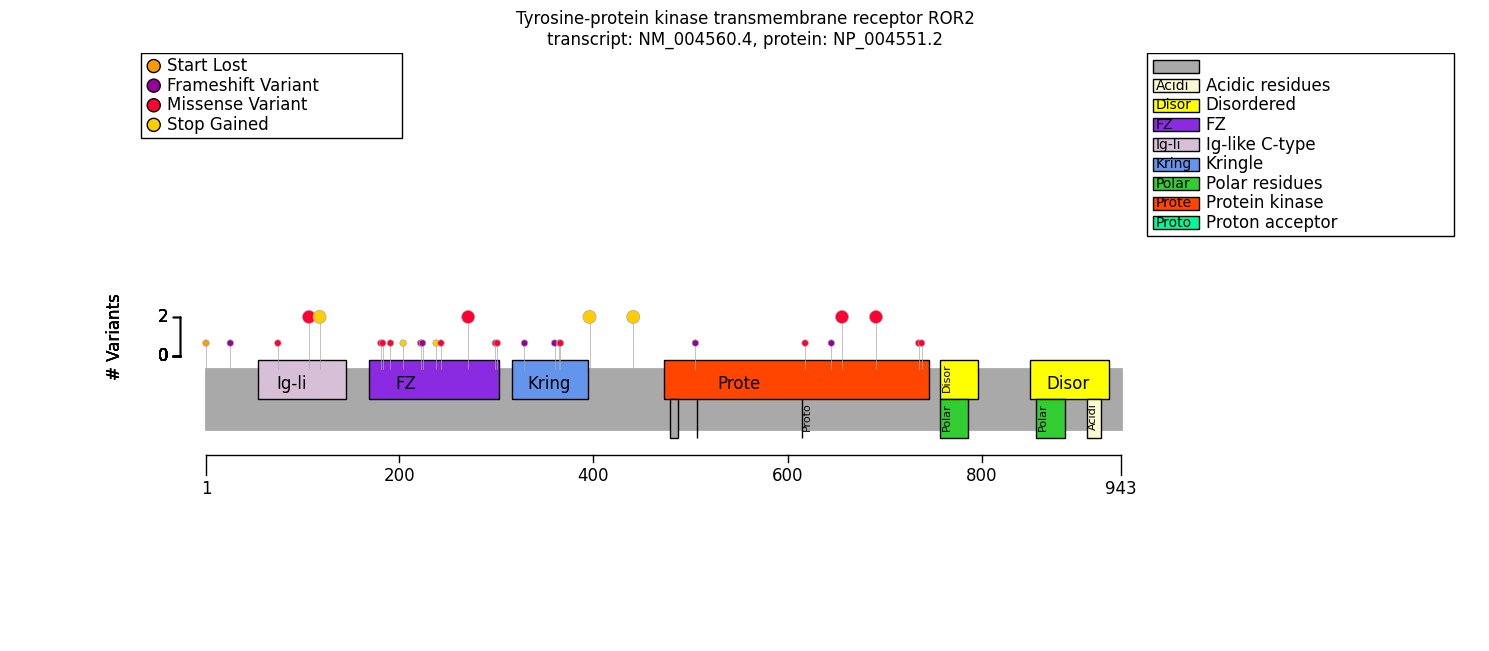

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt
ror2_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
ror2_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
5,Ig-like C2-type,Domain,56 - 145,p.Gly76Asp; p.Arg108Gln; p.Arg119Ter
12,FZ,Domain,170 - 303,p.Arg244Trp; p.Arg272Cys; p.Gln225HisfsTer220; p.Arg184Cys; p.Cys239Ter; p.Cys223Tyr; p.Tyr192Asp; p.Arg205Ter; p.Arg302Cys; p.Cys300Phe; p.Cys182Tyr
4,Kringle,Domain,317 - 394,p.Arg366Trp; p.His362ThrfsTer83; p.Asn367Ile; p.Thr331ProfsTer114
9,Protein kinase,Domain,474 - 746,p.Tyr646CysfsTer57; p.Pro692Thr; p.Arg736Gln; p.Arg619Ser; p.Ile506Ter; p.Arg657His; p.Phe739Leu
0,,Binding site,480 - 487,
0,,Binding site,508 - 507,
0,Proton acceptor,Active site,616 - 615,
0,Disordered,Region,758 - 796,
0,Polar residues,Compositional bias,758 - 786,
0,Disordered,Region,851 - 931,


In [7]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
2,9_91757380_91757380_G_A,c.355C>T (p.Arg119Ter),3,stop gained
2,9_91724524_91724524_C_T,c.1970G>A (p.Arg657His),9,missense
2,9_91724420_91724420_G_T,c.2074C>A (p.Pro692Thr),9,missense
2,9_91726603_91726603_G_A,c.1324C>T (p.Arg442Ter),8,stop gained
2,9_91733245_91733245_G_A,c.814C>T (p.Arg272Cys),6,missense
2,9_91726738_91726738_G_A,c.1189C>T (p.Arg397Ter),8,stop gained
2,SO:1000029_HGNC:10257_ROR2,SV involving ROR2 (p.?),,chromosomal deletion
2,9_91733447_91733447_C_T,c.623-11G>A (-),-,"splice polypyrimidine, intronic"
2,9_91757412_91757412_C_T,c.323G>A (p.Arg108Gln),3,missense
1,9_91737400_91737400_G_A,c.613C>T (p.Arg205Ter),5,stop gained


# Genotype-Phenotype Correlation (GPC) Analysis

In [9]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [10]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect
from gpsea.analysis.clf import biallelic_classifier
from gpsea.view import MtcStatsViewer

missense = variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)


missense_clf = biallelic_classifier(
    a_predicate=missense, 
    b_predicate=~missense, 
    a_label= "missense", 
    b_label="other",
    partitions=((0,1),(2,))
)
missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(missense_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,27
HMF03,Skipping term because of a child term with the same individual counts,21
HMF08,Skipping general term,55
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,130


In [11]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       missense/missense OR missense/other  \
                                                                                 Count   
Depressed nasal bridge [HP:0005280]                                              13/15   
Long palpebral fissure [HP:0000637]                                               6/12   
Pectus excavatum [HP:0000767]                                                     3/10   
Short neck [HP:0000470]                                                           8/10   
Broad thumb [HP:0011304]                                                          9/12   
...                                                                                ...   
Micropenis [HP:0000054]                                                          11/11   
External genital hypoplasia [HP:0003241]                                         12/12   
Abnormal external genitalia morphology [HP:0000...                               12/12   
Abnormal male external genitalia morphology [HP...                               11/11   
Abnormal penis morphology [HP:0000036]                                           11/11   

Allele group                                               other/other  \
                                                   Percent       Count   
Depressed nasal bridge [HP:0005280]                    87%        7/12   
Long palpebral fissure [HP:0000637]                    50%       10/12   
Pectus excavatum [HP:0000767]                          30%        7/11   
Short neck [HP:0000470]                                80%        6/12   
Broad thumb [HP:0011304]                               75%        7/14   
...                                                    ...         ...   
Micropenis [HP:0000054]                               100%         5/5   
External genital hypoplasia [HP:0003241]              100%         8/8   
Abnormal external genitalia morphology [HP:0000...    100%         8/8   
Abnormal male external genitalia morphology [HP...    100%         5/5   
Abnormal penis morphology [HP:0000036]                100%         5/5   

Allele group                                                                   \
                                                   Percent Corrected p values   
Depressed nasal bridge [HP:0005280]                    58%                1.0   
Long palpebral fissure [HP:0000637]                    83%                1.0   
Pectus excavatum [HP:0000767]                          64%                1.0   
Short neck [HP:0000470]                                50%                1.0   
Broad thumb [HP:0011304]                               50%                1.0   
...                                                    ...                ...   
Micropenis [HP:0000054]                               100%                1.0   
External genital hypoplasia [HP:0003241]              100%                1.0   
Abnormal external genitalia morphology [HP:0000...    100%                1.0   
Abnormal male external genitalia morphology [HP...    100%                1.0   
Abnormal penis morphology [HP:0000036]                100%                1.0   

Allele group                                                  
                                                    p values  
Depressed nasal bridge [HP:0005280]                 0.185024  
Long palpebral fissure [HP:0000637]                 0.193027  
Pectus excavatum [HP:0000767]                       0.198381  
Short neck [HP:0000470]                             0.204334  
Broad thumb [HP:0011304]                            0.247516  
...                                                      ...  
Micropenis [HP:0000054]                             1.000000  
External genital hypoplasia [HP:0003241]            1.000000  
Abnormal external genitalia morphology [HP:0000...  1.000000  
Abnormal male external genitalia morphology [HP...  1.000000  
Abnormal penis morphology [HP:0000036]              1.00

In [12]:
# FZ DOMAIN
from gpsea.analysis.predicate import protein_feature

fz_domain = protein_feature(feature_id="FZ", protein_metadata=protein_meta)
fz_clf = biallelic_classifier(
    a_predicate=fz_domain, 
    b_predicate=~fz_domain, 
    a_label= "FZ domain", 
    b_label="other",
    partitions=((0,1),(2,))
)
fz_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=fz_clf,
   pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=fz_result)

Allele group                                       FZ domain/FZ domain OR FZ domain/other  \
                                                                                    Count   
Single transverse palmar crease [HP:0000954]                                          5/7   
Low-set ears [HP:0000369]                                                             8/8   
Cryptorchidism [HP:0000028]                                                           0/5   
Anteverted nares [HP:0000463]                                                         7/9   
Hip dislocation [HP:0002827]                                                          2/5   
...                                                                                   ...   
Abnormal male external genitalia morphology [HP...                                    7/7   
Abnormal penis morphology [HP:0000036]                                                7/7   
Depressed nasal bridge [HP:0005280]                                                   7/9   
Broad hallux [HP:0010055]                                                             2/5   
Epicanthus [HP:0000286]                                                               2/5   

Allele group                                               other/other  \
                                                   Percent       Count   
Single transverse palmar crease [HP:0000954]           71%        2/14   
Low-set ears [HP:0000369]                             100%        9/16   
Cryptorchidism [HP:0000028]                             0%         5/8   
Anteverted nares [HP:0000463]                          78%       19/19   
Hip dislocation [HP:0002827]                           40%        1/14   
...                                                    ...         ...   
Abnormal male external genitalia morphology [HP...    100%         9/9   
Abnormal penis morphology [HP:0000036]                100%         9/9   
Depressed nasal bridge [HP:0005280]                    78%       13/18   
Broad hallux [HP:0010055]                              40%        7/13   
Epicanthus [HP:0000286]                                40%        5/17   

Allele group                                                                   \
                                                   Percent Corrected p values   
Single transverse palmar crease [HP:0000954]           14%                1.0   
Low-set ears [HP:0000369]                              56%                1.0   
Cryptorchidism [HP:0000028]                            62%                1.0   
Anteverted nares [HP:0000463]                         100%                1.0   
Hip dislocation [HP:0002827]                            7%                1.0   
...                                                    ...                ...   
Abnormal male external genitalia morphology [HP...    100%                1.0   
Abnormal penis morphology [HP:0000036]                100%                1.0   
Depressed nasal bridge [HP:0005280]                    72%                1.0   
Broad hallux [HP:0010055]                              54%                1.0   
Epicanthus [HP:0000286]                                29%                1.0   

Allele group                                                  
                                                    p values  
Single transverse palmar crease [HP:0000954]        0.017286  
Low-set ears [HP:0000369]                           0.053787  
Cryptorchidism [HP:0000028]                         0.075369  
Anteverted nares [HP:0000463]                       0.095238  
Hip dislocation [HP:0002827]                        0.154799  
...                                                      ...  
Abnormal male external genitalia morphology [HP...  1.000000  
Abnormal penis morphology [HP:0000036]              1.000000  
Depressed nasal bridge [HP:0005280]                 1.000000  
Broad hallux [HP:0010055]                           1.000000  
Epicanthus [HP:00

# Summary

In [13]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
    GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_mono(
        result=fz_result,
    ),
)

caption ="No statistically significant genotype-phenotype correlation was identified."

report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [14]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
missense/missense OR missense/other,other/other,100,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FZ domain/FZ domain OR FZ domain/other,other/other,102,0


In [15]:
summarizer.process_latex(report=report, protein_fig=ror2_fig)

Figure saved to ../../supplement/img/ROR2_protein_diagram-draft.pdf
Output to ../../supplement/tex/ROR2_summary_draft.tex
